In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


def information_based_correlation_coefficient(X, Y):

    # Calculate differences between consecutive elements
    differences_X = np.diff(X)
    differences_Y = np.diff(Y)

    # Consider same sign for zero differences
    signs_X = np.sign(differences_X)
    signs_Y = np.sign(differences_Y)
    signs_X[differences_X == 0] = np.sign(np.roll(differences_X, 1))[differences_X == 0]
    signs_Y[differences_Y == 0] = np.sign(np.roll(differences_Y, 1))[differences_Y == 0]

    # Count matches of signs
    matches = np.where(signs_X == signs_Y, 1, 0)

    # Calculate the proportion of matching signs
    p = np.sum(matches) / len(matches)

    # Estimate the binary entropy H
    entropy = - p * np.log2(p) - (1 - p) * np.log2(1 - p) if p not in (0, 1) else 0

    # Calculate the ICC using binary entropy
    icc = 1 - entropy if p >= 0.5 else entropy - 1

    return icc

# Generate example data
np.random.seed(0)  # For reproducibility
X = np.random.rand(100)  # Example random data for time series X
Y = np.random.rand(100)  # Example random data for time series Y

# Calculate ICC
icc_value = information_based_correlation_coefficient(X, Y)
print("Information-based Correlation Coefficient (ICC):", icc_value)


Information-based Correlation Coefficient (ICC): -0.016623809860776384


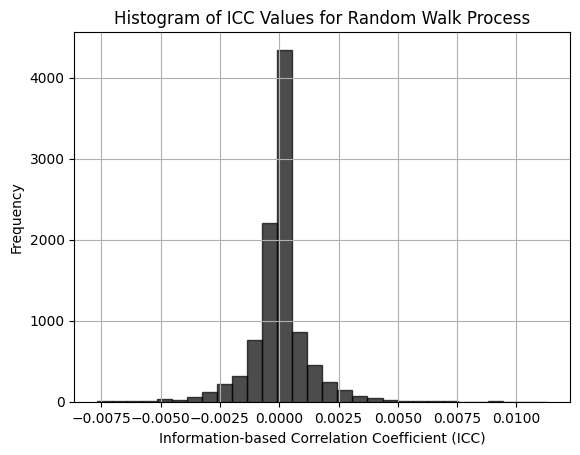

In [ ]:

# Monte Carlo simulation parameters
num_simulations = 10000
sample_size = 1000

# Initialize an array to store ICC values
icc_values = np.zeros(num_simulations)

# Perform the Monte Carlo simulation
for i in range(num_simulations):
    # Generate random walk time series
    random_walk_X = np.cumsum(np.random.normal(size=sample_size))
    random_walk_Y = np.cumsum(np.random.normal(size=sample_size))

    # Calculate ICC for the generated random walk series
    icc_values[i] = information_based_correlation_coefficient(random_walk_X, random_walk_Y)

# Plot the histogram of ICC values
plt.hist(icc_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of ICC Values for Random Walk Process")
plt.xlabel("Information-based Correlation Coefficient (ICC)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


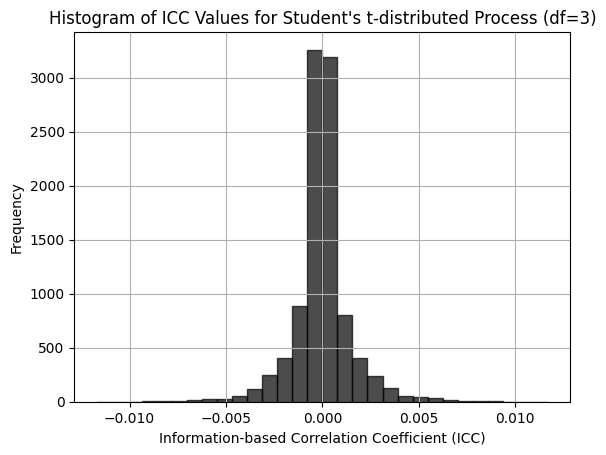

In [ ]:
from scipy.stats import t

# Simulation parameters
np.random.seed(0)
num_simulations = 10000
sample_size = 1000
degrees_of_freedom = 3

icc_values = np.zeros(num_simulations)

# Monte Carlo simulation
for i in range(num_simulations):
    series_Y = t.rvs(df=degrees_of_freedom, size=sample_size)
    series_Z = t.rvs(df=degrees_of_freedom, size=sample_size)
    icc_values[i] = information_based_correlation_coefficient(series_Y, series_Z)

# Plot histogram
plt.hist(icc_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of ICC Values for Student's t-distributed Process (df=3)")
plt.xlabel("Information-based Correlation Coefficient (ICC)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


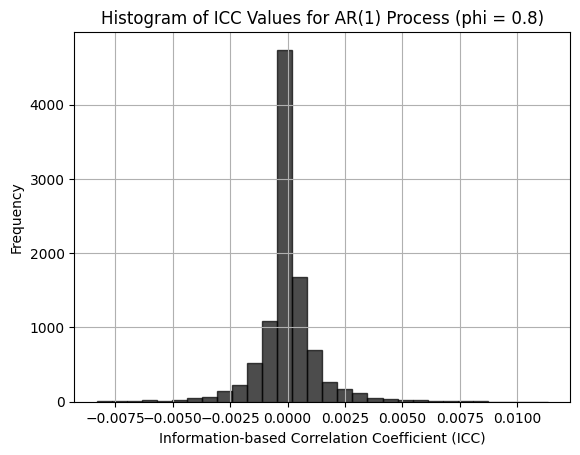

In [ ]:

# Simulation parameters
np.random.seed(0)
num_simulations = 10000
sample_size = 1000
phi = 0.8  # AR(1) parameter

icc_values = np.zeros(num_simulations)

# Monte Carlo simulation
for i in range(num_simulations):
    Y = np.zeros(sample_size)
    Z = np.zeros(sample_size)
    Y[0] = np.random.normal()
    Z[0] = np.random.normal()

    for t in range(1, sample_size):
        Y[t] = phi * Y[t-1] + np.random.normal()
        Z[t] = phi * Z[t-1] + np.random.normal()

    icc_values[i] = information_based_correlation_coefficient(Y, Z)

# Plot histogram
plt.hist(icc_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of ICC Values for AR(1) Process (phi = 0.8)")
plt.xlabel("Information-based Correlation Coefficient (ICC)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


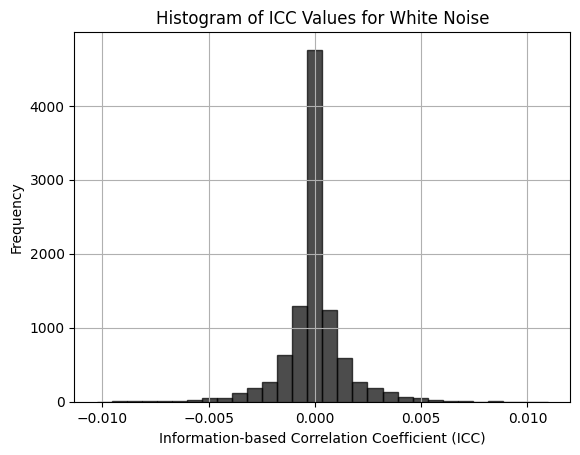

In [ ]:


# Parameters
np.random.seed(0)
num_simulations = 10000
sample_size = 1000

icc_values = np.zeros(num_simulations)

# Monte Carlo simulation
for i in range(num_simulations):
    white_noise_Y = np.random.randn(sample_size)
    white_noise_Z = np.random.randn(sample_size)
    icc_values[i] = information_based_correlation_coefficient(white_noise_Y, white_noise_Z)

# Plotting
plt.hist(icc_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of ICC Values for White Noise")
plt.xlabel("Information-based Correlation Coefficient (ICC)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


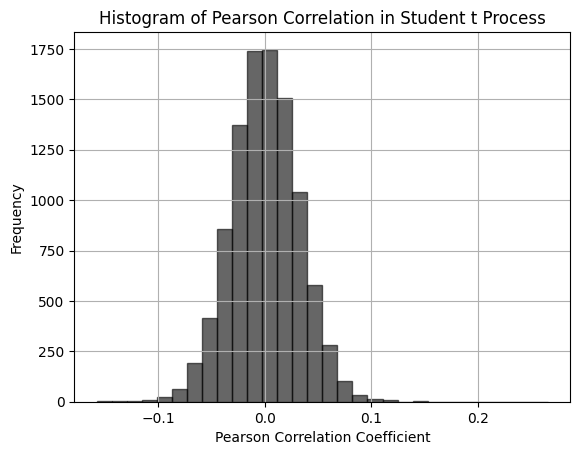

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
num_samples = 10000  # Number of Monte Carlo samples
sample_size = 1000   # Size of each sample
degrees_of_freedom = 3  # Degrees of freedom for the student t distribution

# Initialize an array to store the correlation values
correlation_values = np.zeros(num_samples)

# Perform the Monte Carlo simulation
for i in range(num_samples):
    # Generate random samples from the student t distribution
    x = np.random.standard_t(degrees_of_freedom, size=sample_size)
    y = np.random.standard_t(degrees_of_freedom, size=sample_size)

    # Calculate the Pearson correlation coefficient
    correlation_values[i] = np.corrcoef(x, y)[0, 1]

# Plot the histogram
plt.hist(correlation_values, bins=30, color='black', edgecolor='black', alpha=0.6)
plt.title('Histogram of Pearson Correlation in Student t Process')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


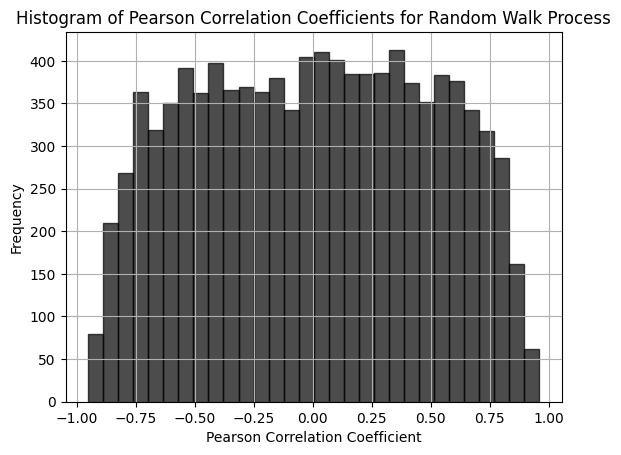

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random walk
def generate_random_walk(size):
    return np.cumsum(np.random.normal(size=size))

# Function to calculate Pearson correlation coefficient
def calculate_pearson_correlation(X, Y):
    return np.corrcoef(X, Y)[0, 1]

# Monte Carlo simulation parameters
num_simulations = 10000
sample_size = 1000

# Initialize an array to store Pearson correlation coefficients
pearson_correlation_values = np.zeros(num_simulations)

# Perform the Monte Carlo simulation
for i in range(num_simulations):
    # Generate random walk time series
    random_walk_X = generate_random_walk(sample_size)
    random_walk_Y = generate_random_walk(sample_size)

    # Calculate Pearson correlation coefficient for the generated random walk series
    pearson_correlation_values[i] = calculate_pearson_correlation(random_walk_X, random_walk_Y)

# Plot the histogram of Pearson correlation coefficients
plt.hist(pearson_correlation_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of Pearson Correlation Coefficients for Random Walk Process")
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


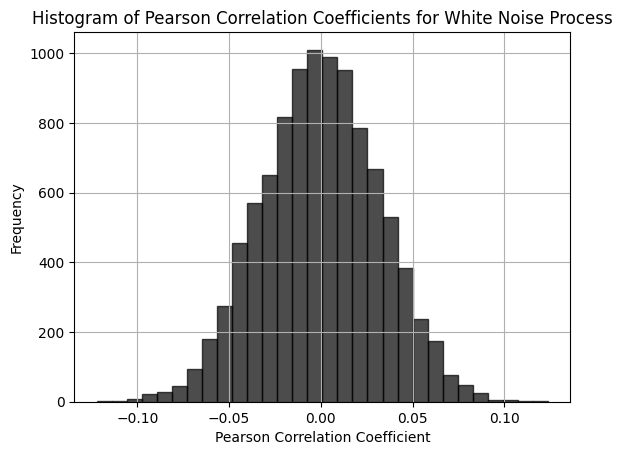

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate white noise
def generate_white_noise(size):
    return np.random.randn(size)

# Function to calculate Pearson correlation coefficient
def calculate_pearson_correlation(X, Y):
    return np.corrcoef(X, Y)[0, 1]

# Monte Carlo simulation parameters
num_simulations = 10000
sample_size = 1000

# Initialize an array to store Pearson correlation coefficients
pearson_correlation_values = np.zeros(num_simulations)

# Perform the Monte Carlo simulation
for i in range(num_simulations):
    # Generate white noise time series
    white_noise_X = generate_white_noise(sample_size)
    white_noise_Y = generate_white_noise(sample_size)

    # Calculate Pearson correlation coefficient for the generated white noise series
    pearson_correlation_values[i] = calculate_pearson_correlation(white_noise_X, white_noise_Y)

# Plot the histogram of Pearson correlation coefficients
plt.hist(pearson_correlation_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of Pearson Correlation Coefficients for White Noise Process")
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


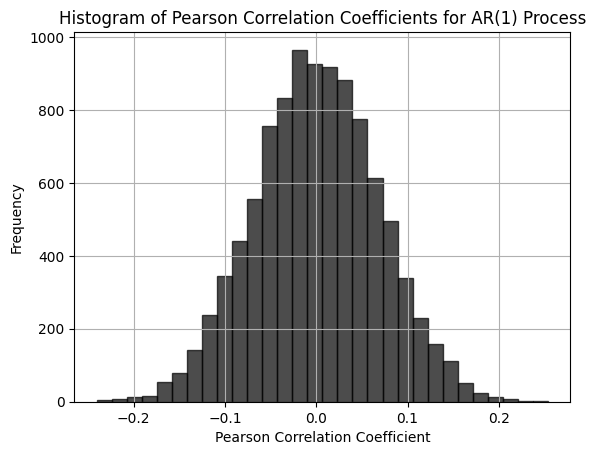

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate AR(1) time series
def generate_ar1_process(size, phi):
    ar1_series = [np.random.normal()]
    for _ in range(1, size):
        ar1_series.append(phi * ar1_series[-1] + np.random.normal())
    return np.array(ar1_series)

# Function to calculate Pearson correlation coefficient
def calculate_pearson_correlation(X, Y):
    return np.corrcoef(X, Y)[0, 1]

# Monte Carlo simulation parameters
num_simulations = 10000
sample_size = 1000
phi = 0.8  # Autoregressive parameter in AR(1) process

# Initialize an array to store Pearson correlation coefficients
pearson_correlation_values = np.zeros(num_simulations)

# Perform the Monte Carlo simulation
for i in range(num_simulations):
    # Generate AR(1) time series
    ar1_series_X = generate_ar1_process(sample_size, phi)
    ar1_series_Y = generate_ar1_process(sample_size, phi)

    # Calculate Pearson correlation coefficient for the generated AR(1) series
    pearson_correlation_values[i] = calculate_pearson_correlation(ar1_series_X, ar1_series_Y)

# Plot the histogram of Pearson correlation coefficients
plt.hist(pearson_correlation_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of Pearson Correlation Coefficients for AR(1) Process")
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


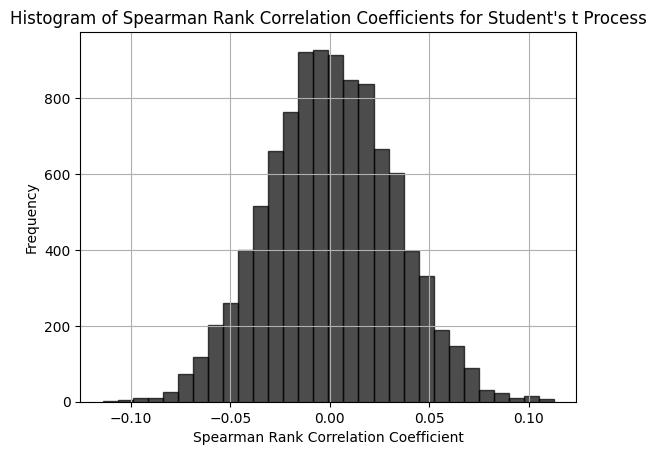

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, t

# Function to generate Student's t process
def generate_student_t_process(size, df):
    return t.rvs(df, size=size)

# Function to calculate Spearman rank correlation coefficient
def calculate_spearman_rank_correlation(X, Y):
    return spearmanr(X, Y).correlation

# Monte Carlo simulation parameters
num_simulations = 10000
sample_size = 1000
degrees_of_freedom = 3  # Change this parameter as needed

# Initialize an array to store Spearman rank correlation coefficients
spearman_rank_correlation_values = np.zeros(num_simulations)

# Perform the Monte Carlo simulation
for i in range(num_simulations):
    # Generate Student's t process time series
    student_t_X = generate_student_t_process(sample_size, degrees_of_freedom)
    student_t_Y = generate_student_t_process(sample_size, degrees_of_freedom)

    # Calculate Spearman rank correlation coefficient for the generated Student's t process series
    spearman_rank_correlation_values[i] = calculate_spearman_rank_correlation(student_t_X, student_t_Y)

# Plot the histogram of Spearman rank correlation coefficients
plt.hist(spearman_rank_correlation_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of Spearman Rank Correlation Coefficients for Student's t Process")
plt.xlabel("Spearman Rank Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


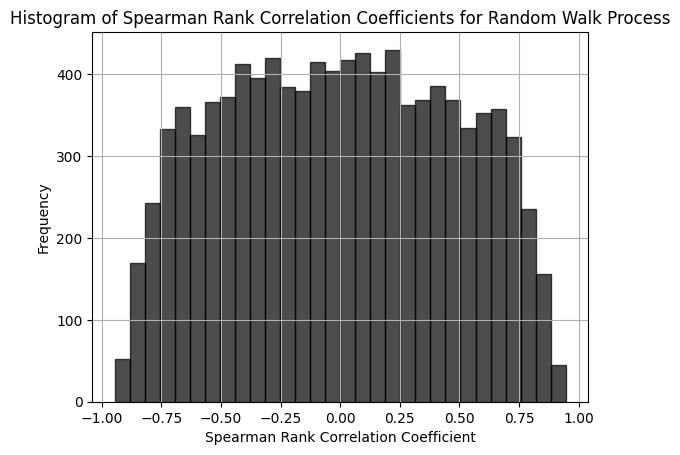

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Function to generate random walk
def generate_random_walk(size):
    return np.cumsum(np.random.normal(size=size))

# Function to calculate Spearman rank correlation coefficient
def calculate_spearman_rank_correlation(X, Y):
    return spearmanr(X, Y).correlation

# Monte Carlo simulation parameters
num_simulations = 10000
sample_size = 1000
# Initialize an array to store Spearman rank correlation coefficients
spearman_rank_correlation_values = np.zeros(num_simulations)

# Perform the Monte Carlo simulation
for i in range(num_simulations):
    # Generate random walk time series
    random_walk_X = generate_random_walk(sample_size)
    random_walk_Y = generate_random_walk(sample_size)

    # Calculate Spearman rank correlation coefficient for the generated random walk series
    spearman_rank_correlation_values[i] = calculate_spearman_rank_correlation(random_walk_X, random_walk_Y)

# Plot the histogram of Spearman rank correlation coefficients
plt.hist(spearman_rank_correlation_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of Spearman Rank Correlation Coefficients for Random Walk Process")
plt.xlabel("Spearman Rank Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


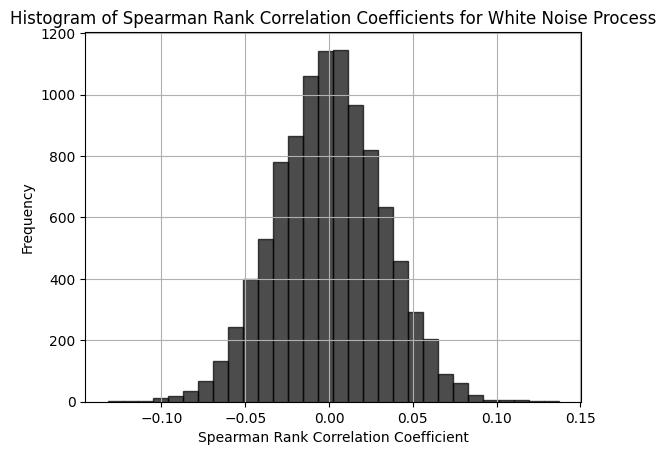

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Function to generate white noise
def generate_white_noise(size):
    return np.random.randn(size)

# Function to calculate Spearman rank correlation coefficient
def calculate_spearman_rank_correlation(X, Y):
    return spearmanr(X, Y).correlation

# Monte Carlo simulation parameters
num_simulations = 10000
sample_size = 1000

# Initialize an array to store Spearman rank correlation coefficients
spearman_rank_correlation_values = np.zeros(num_simulations)

# Perform the Monte Carlo simulation
for i in range(num_simulations):
    # Generate white noise time series
    white_noise_X = generate_white_noise(sample_size)
    white_noise_Y = generate_white_noise(sample_size)

    # Calculate Spearman rank correlation coefficient for the generated white noise series
    spearman_rank_correlation_values[i] = calculate_spearman_rank_correlation(white_noise_X, white_noise_Y)

# Plot the histogram of Spearman rank correlation coefficients
plt.hist(spearman_rank_correlation_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of Spearman Rank Correlation Coefficients for White Noise Process")
plt.xlabel("Spearman Rank Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


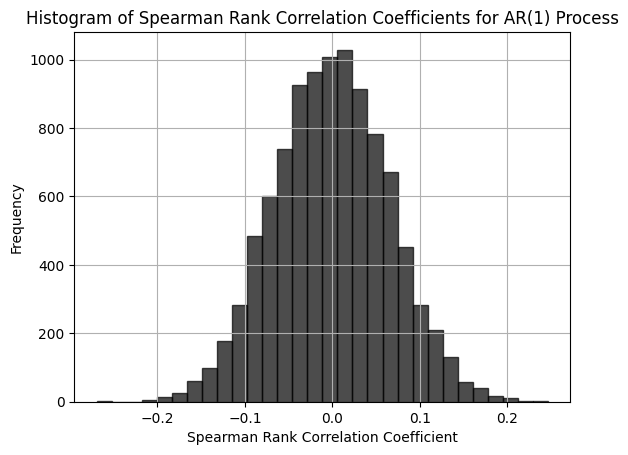

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Function to generate AR(1) time series
def generate_ar1_process(size, phi):
    ar1_series = [np.random.normal()]
    for _ in range(1, size):
        ar1_series.append(phi * ar1_series[-1] + np.random.normal())
    return np.array(ar1_series)

# Function to calculate Spearman rank correlation coefficient
def calculate_spearman_rank_correlation(X, Y):
    return spearmanr(X, Y).correlation

# Monte Carlo simulation parameters
num_simulations = 10000
sample_size = 1000
phi = 0.8  # Autoregressive parameter in AR(1) process

# Initialize an array to store Spearman rank correlation coefficients
spearman_rank_correlation_values = np.zeros(num_simulations)

# Perform the Monte Carlo simulation
for i in range(num_simulations):
    # Generate AR(1) time series
    ar1_series_X = generate_ar1_process(sample_size, phi)
    ar1_series_Y = generate_ar1_process(sample_size, phi)

    # Calculate Spearman rank correlation coefficient for the generated AR(1) series
    spearman_rank_correlation_values[i] = calculate_spearman_rank_correlation(ar1_series_X, ar1_series_Y)

# Plot the histogram of Spearman rank correlation coefficients
plt.hist(spearman_rank_correlation_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of Spearman Rank Correlation Coefficients for AR(1) Process")
plt.xlabel("Spearman Rank Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


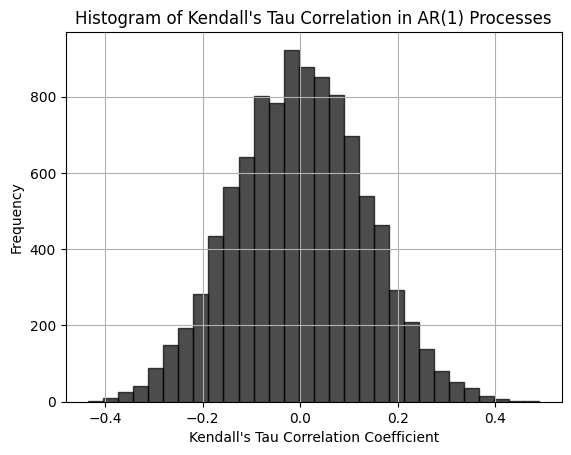

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Set the parameters
num_samples = 10000  # Number of Monte Carlo samples
sample_size = 100   # Size of each sample
phi = 0.8            # Autoregressive parameter in AR(1) process

# Initialize an array to store the correlation values
correlation_values = np.zeros(num_samples)

# Perform the Monte Carlo simulation
for i in range(num_samples):
    # Generate an AR(1) process
    ar1_process_x = [np.random.normal()]
    ar1_process_y = [np.random.normal()]

    for _ in range(1, sample_size):
        ar1_process_x.append(phi * ar1_process_x[-1] + np.random.normal())
        ar1_process_y.append(phi * ar1_process_y[-1] + np.random.normal())

    # Calculate Kendall's tau correlation coefficient
    correlation, _ = kendalltau(ar1_process_x, ar1_process_y)
    correlation_values[i] = correlation

# Plot the histogram
plt.hist(correlation_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of Kendall's Tau Correlation in AR(1) Processes")
plt.xlabel("Kendall's Tau Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(True)


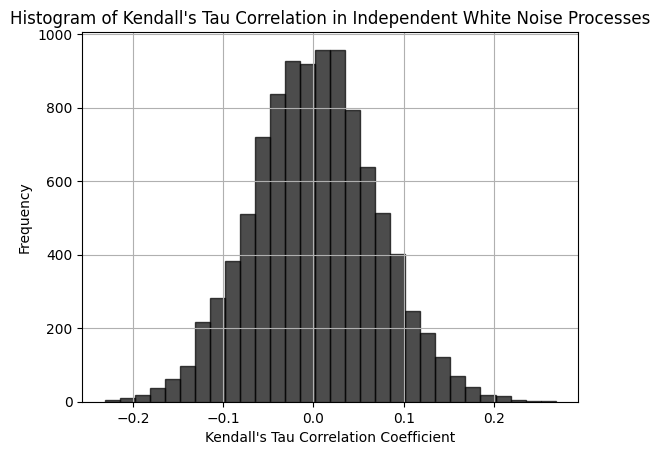

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Set the parameters
num_samples = 10000 # Number of Monte Carlo samples
sample_size = 100   # Size of each sample

# Initialize an array to store the correlation values
correlation_values = np.zeros(num_samples)

# Perform the Monte Carlo simulation
for i in range(num_samples):
    # Generate independent white noise processes
    white_noise_x = np.random.normal(size=sample_size)
    white_noise_y = np.random.normal(size=sample_size)

    # Calculate Kendall's tau correlation coefficient
    correlation, _ = kendalltau(white_noise_x, white_noise_y)
    correlation_values[i] = correlation

# Plot the histogram
plt.hist(correlation_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of Kendall's Tau Correlation in Independent White Noise Processes")
plt.xlabel("Kendall's Tau Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


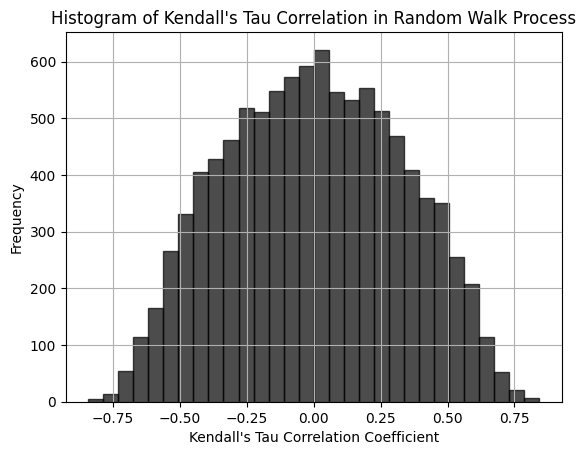

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Set the parameters
num_samples = 10000  # Number of Monte Carlo samples
sample_size = 100   # Size of each sample

# Initialize an array to store the correlation values
correlation_values = np.zeros(num_samples)

# Perform the Monte Carlo simulation
for i in range(num_samples):
    # Generate a random walk process
    random_walk_x = np.cumsum(np.random.normal(size=sample_size))
    random_walk_y = np.cumsum(np.random.normal(size=sample_size))

    # Calculate Kendall's tau correlation coefficient
    correlation, _ = kendalltau(random_walk_x, random_walk_y)
    correlation_values[i] = correlation

# Plot the histogram
plt.hist(correlation_values, bins=30, color='black', edgecolor='black', alpha=0.7)
plt.title("Histogram of Kendall's Tau Correlation in Random Walk Process")
plt.xlabel("Kendall's Tau Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


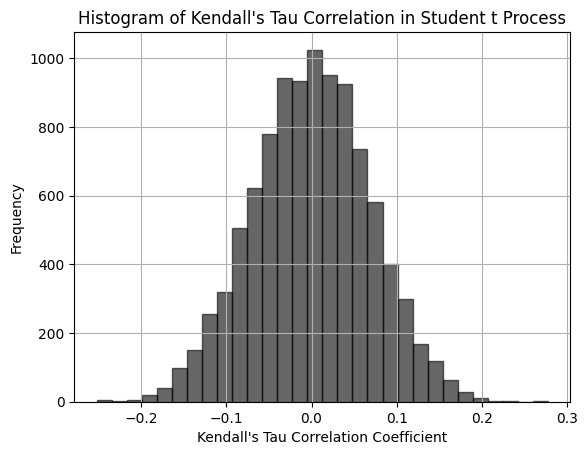

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Set the parameters
num_samples = 10000  # Number of Monte Carlo samples (increased to 10,000)
sample_size = 100    # Size of each sample
degrees_of_freedom = 5  # Degrees of freedom for the student t distribution

# Initialize an array to store the correlation values
correlation_values = np.zeros(num_samples)

# Perform the Monte Carlo simulation
for i in range(num_samples):
    # Generate random samples from the student t distribution
    x = np.random.standard_t(degrees_of_freedom, size=sample_size)
    y = np.random.standard_t(degrees_of_freedom, size=sample_size)

    # Calculate Kendall's tau correlation coefficient
    correlation, _ = kendalltau(x, y)
    correlation_values[i] = correlation

# Plot the histogram
plt.hist(correlation_values, bins=30, color='black', edgecolor='black', alpha=0.6)
plt.title("Histogram of Kendall's Tau Correlation in Student t Process")
plt.xlabel("Kendall's Tau Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
